In [32]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
tabela = pd.read_csv('vozila 14_1 brez hudih porab brez hudih moci.csv', sep=';', encoding='latin1', low_memory=False)
tabela = tabela[['Registrsko obmocje', 'Masa', 'Znamka', 'Masa', 'ccm', 'Moc', 'Gorivo',
                 'Najvisja hitrost', 'CO2', 'poraba 10x', 'Okoljevarstvena oznaka', 'Leto izdelave']]
tabela['poraba 10x'] = tabela['poraba 10x']/10
tabela.columns = ['Registrsko obmocje', 'Masa', 'Znamka', 'Masa', 'ccm', 'Moc', 'Gorivo',
                 'Najvisja hitrost', 'CO2', 'Poraba goriva', 'Okoljevarstvena oznaka', 'Leto izdelave']

In [34]:
tabela[:10]

,Registrsko obmocje,Masa,Znamka,Masa,ccm,Moc,Gorivo,Najvisja hitrost,CO2,Poraba goriva,Okoljevarstvena oznaka,Leto izdelave
0,LJUBLJANA,2458,JEEP,2458,6417,344,P,257,315.0,13.5,6,2014
1,LJUBLJANA,2458,JEEP,2458,6417,344,P,257,328.0,14.1,5,2012
2,NOVO MESTO,2458,JEEP,2458,6417,344,P,257,328.0,14.1,5,2012
3,CELJE,2085,MERCEDES BENZ,2085,6209,386,P,300,335.0,14.9,4,2008
4,KOPER,2085,MERCEDES BENZ,2085,6209,386,P,250,355.0,14.9,4,2008
5,KOPER,2085,MERCEDES BENZ,2085,6209,386,P,250,355.0,14.9,4,2008
6,KOPER,2085,MERCEDES BENZ,2085,6209,386,P,250,355.0,14.9,4,2008
7,KOPER,2085,MERCEDES BENZ,2085,6209,386,P,250,355.0,14.9,4,2007
8,KRANJ,2010,MERCEDES BENZ,2010,6209,386,P,250,241.0,10.1,4,2007
9,LJUBLJANA,2010,MERCEDES BENZ,2010,6209,386,P,250,241.0,10.1,4,2008


# 1. Znamke po Sloveniji

Za predstavo, kateri avtomobili se vozijo po slovenskih cestah, si oglejmo njihovo porazdelitev po 10 najbolj pogosto zastopanih znamkah.

In [5]:
a = tabela.groupby('Registrsko obmocje')['Znamka']
pogoste = ['RENAULT', 'VOLKSWAGEN', 'OPEL', 'CITROEN', 'PEUGEOT', 'FORD', 'SKODA', 'AUDI', 'BMW', 'HYUNDAI']
zn = pd.DataFrame(a.value_counts()).unstack()['Znamka'][pogoste]
zn
vsote = pd.DataFrame(zn.sum(axis = 1))

zn_norm = zn.div(zn.sum(axis=1), axis=0)

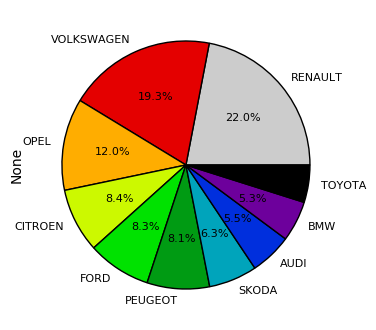

In [6]:
znamke = tabela.groupby('Znamka')
znamke.size().sort_values(ascending=False)[:10].plot(kind='pie',figsize=(4, 4), fontsize=8, autopct='%1.1f%%', colormap='spectral_r')

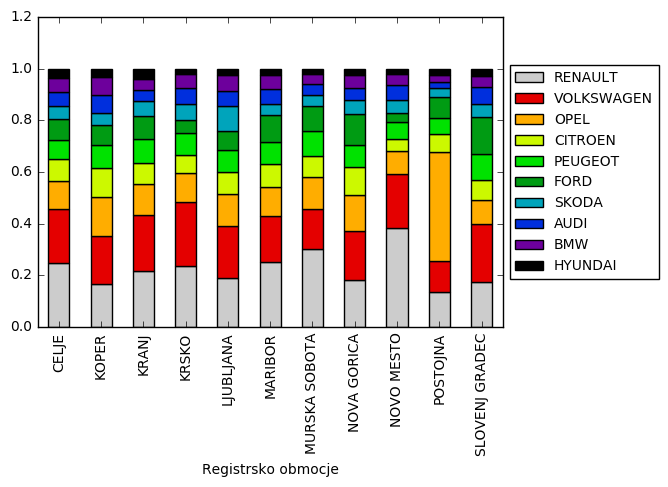

In [7]:
zn_norm.plot(kind='bar', stacked=True, colormap='spectral_r', legend=False)
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

Največji delež predstavljajo znamke Renault, Volkswagen in Opel. 

V diagramu, ki kaže zastopanost znamk v posameznem registrskem območju, opazimo, da je porazdelitev, razen nekaj izjem, dokaj podobna v vseh območjih. 

Najbolj izstopa relativno visoka pogostost Opla v Postojni.

# 2. Parametri po registrskih območjih

## 2.1 Število avtomobilov

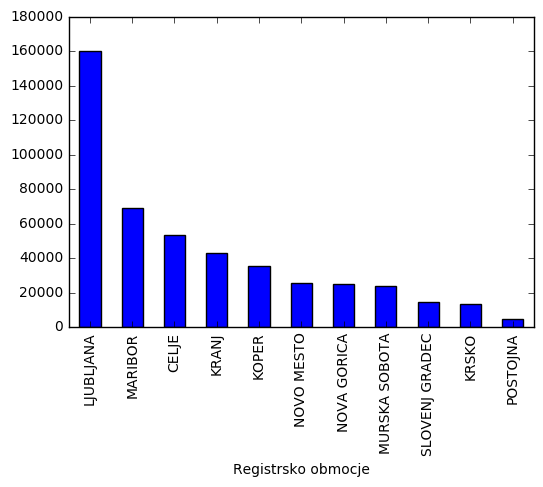

In [8]:
stevilo = tabela.groupby('Registrsko obmocje')
stevilo.size().sort_values(ascending=False).plot(kind='bar',figsize=(6, 4))

Ni presenetljivo, da je več avtomobilov v krajih z več prebivalci. Žal se statistične regije ne ujemajo z registrskimi območji in izračun, koliko avtomobilov povprečno ima prebivalecv posameznem območju, ni mogoč.

Lahko pa raziščemo, kje so avtomobili najbolj ekološki, najmočnejši in najnovejši.

## 2.2 Poraba goriva in izpust CO2

Začnimo z analizo porabe goriva in izpustom CO2.

In [9]:
poraba = tabela[['Registrsko obmocje', 'Poraba goriva', 'CO2', 'ccm']]

In [10]:
poraba = tabela[['Registrsko obmocje', 'Poraba goriva', 'CO2', 'ccm']]

In [11]:
skupna_po_krajih = round(poraba.groupby('Registrsko obmocje')[['CO2', 'Poraba goriva', 'ccm']].mean(), 3)

poraba_po_krajih = pd.DataFrame(skupna_po_krajih).sort_values('Poraba goriva', ascending=False)
PORABA = poraba_po_krajih
PORABA['CO2%'] = round((PORABA['CO2'] - min(PORABA['CO2'])) / (max(PORABA['CO2']) - min(PORABA['CO2'])), 3)
PORABA['gorivo%'] = round((PORABA['Poraba goriva'] - min(PORABA['Poraba goriva'])) / (max(PORABA['Poraba goriva']) - min(PORABA['Poraba goriva'])), 3)
PORABA['ccm%'] = round((PORABA['ccm'] - min(PORABA['ccm'])) / (max(PORABA['ccm']) - min(PORABA['ccm'])), 3)

PORABA['|ccm% - gorivo%|'] = abs(PORABA['ccm%'] - PORABA['gorivo%'])

PORABA.reset_index()

,Registrsko obmocje,CO2,Poraba goriva,ccm,CO2%,gorivo%,ccm%,|ccm% - gorivo%|
0,NOVA GORICA,147.835,5.910,1657.053,1.000,1.000,0.676,0.324
1,SLOVENJ GRADEC,147.155,5.889,1659.261,0.879,0.917,0.694,0.223
2,MURSKA SOBOTA,144.412,5.859,1574.804,0.392,0.798,0.000,0.798
3,KRANJ,146.108,5.855,1636.617,0.693,0.782,0.508,0.274
4,POSTOJNA,145.684,5.847,1621.582,0.618,0.750,0.384,0.366
5,MARIBOR,144.788,5.813,1625.649,0.459,0.615,0.418,0.197
6,KOPER,145.961,5.799,1696.559,0.667,0.560,1.000,0.440
7,KRSKO,145.176,5.771,1664.412,0.528,0.448,0.736,0.288
8,CELJE,144.725,5.767,1648.889,0.448,0.433,0.608,0.175
9,LJUBLJANA,144.274,5.757,1675.946,0.368,0.393,0.831,0.438


Stolpec z odstotki je dodan, da lahko z grafa razberemo (ne)ujemanje med porabo goriva in izpustom CO2. 


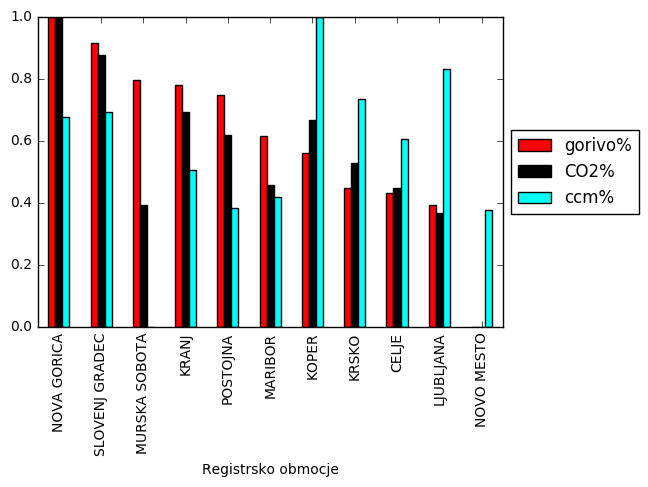

In [12]:
PORABA[['gorivo%', 'CO2%', 'ccm%']].plot(kind='bar', color=('red', 'black', 'cyan'))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Poraba goriva se kar dobro ujema z izpustom CO2.

## 2.3 Večja prostornina, večja poraba

Preverimo, v kolikšni meri drži intuitivna misel, da večja prostornina pomeni večjo porabo. To bomo ugotovili, če izračunamo razliko med odstkovno prostornino in porabo goriva.

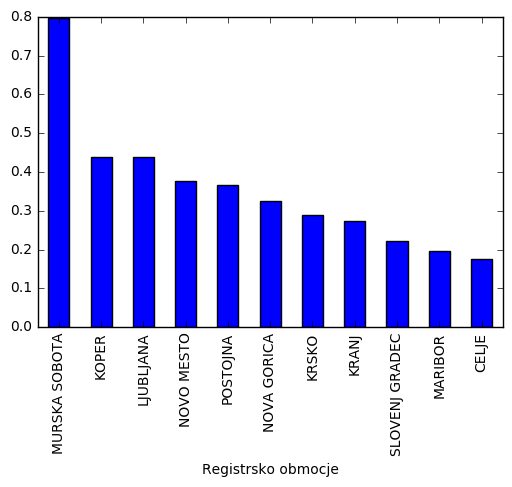

In [13]:
razlika = PORABA['|ccm% - gorivo%|']
razlika.sort_values(ascending=False).plot(kind='bar')

In [14]:
izracun = pd.DataFrame(razlika).sort_values('|ccm% - gorivo%|', ascending=False).reset_index()

# izpustimo največje in najmanjše odstopanje
za_izracun = izracun[1:-1]

round(za_izracun['|ccm% - gorivo%|'].mean(), 3)

0.325

Povprečno odstopanje nam da idejo o veljavnosti. Vidimo, da to zelo pogosto ne pomeni prav veliko.

## 2.4 V glavnem mestu se je treba napihovati

Po svetu velja, da so ljudje iz večjih mest bolj naduti. Ali to pomeni, da imajo tudi močnejše avtomobile?

In [15]:
moc = tabela[['Registrsko obmocje', 'Moc', 'ccm']]
moc_kraji = round(moc.groupby('Registrsko obmocje')[['Moc', 'ccm']].mean(), 3)
MOC = pd.DataFrame(moc_kraji).sort_values('Moc', ascending=False)

MOC['Moc%'] = round((MOC['Moc'] - min(MOC['Moc'])) / (max(MOC['Moc']) - min(MOC['Moc'])), 3)
MOC['ccm%'] = round((MOC['ccm'] - min(MOC['ccm'])) / (max(MOC['ccm']) - min(MOC['ccm'])), 3)

MOC['|Moc% - ccm%|'] = abs(MOC['Moc%'] - MOC['ccm%'])

MOC.reset_index()

,Registrsko obmocje,Moc,ccm,Moc%,ccm%,|Moc% - ccm%|
0,KOPER,86.029,1696.559,1.000,1.000,0.000
1,LJUBLJANA,85.888,1675.946,0.981,0.831,0.150
2,POSTOJNA,83.766,1621.582,0.691,0.384,0.307
3,SLOVENJ GRADEC,83.466,1659.261,0.650,0.694,0.044
4,NOVA GORICA,82.423,1657.053,0.507,0.676,0.169
5,KRANJ,82.194,1636.617,0.476,0.508,0.032
6,CELJE,82.190,1648.889,0.476,0.608,0.132
7,MARIBOR,81.725,1625.649,0.412,0.418,0.006
8,KRSKO,81.568,1664.412,0.391,0.736,0.345
9,NOVO MESTO,80.050,1620.720,0.183,0.377,0.194


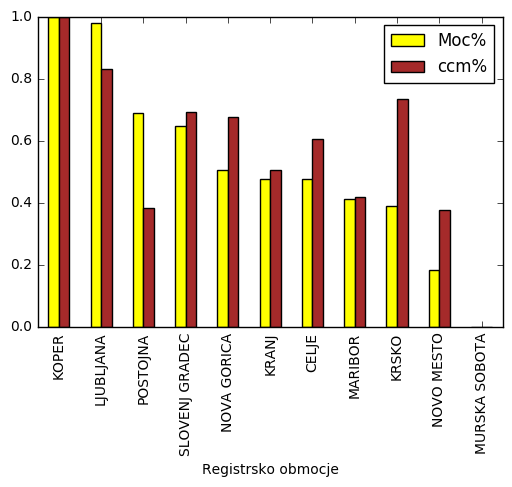

In [16]:
MOC[['Moc%', 'ccm%']].plot(kind='bar', color=('yellow', 'brown'))

Spoznamo, da v Sloveniji ta hipoteza skoraj velja. 

Zanima nas še, kako sta med seboj odvisna moč in prostornina. 

In [17]:
round(MOC['|Moc% - ccm%|'].mean(), 3)

0.125

Vidimo, da sta ta dva parametra kar dobro usklajena.

# 3. Še nekaj zanimivosti

## 3.1 Za več moči je potrebnega več goriva

Preverili bomo še eno izmed zanimivih hipotez in sicer, ali je za več moči res treba bolj pogosto obiskovati bencinske črpalke?

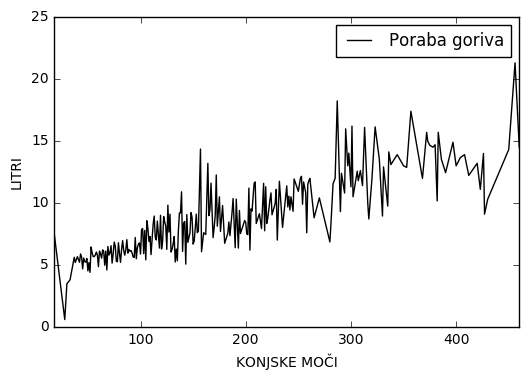

In [72]:
po_moci = round(tabela.groupby('Moc')['Poraba goriva'].mean(), 3)
MOC_PORABA = pd.DataFrame(po_moci)
xy = MOC_PORABA.plot(kind='line', color='black')
xy.set_xlabel('KONJSKE MOČI')
xy.set_ylabel('LITRI')

Torej drži, da imajo v povprečju močnejši avtomobili večjo porabo goriva. 
Opazimo pa še velika nihanja v območju med 150 in 180 konjskimi močmi. Sklepamo, da je to zaradi zelo široke ponudbe avtomobilov s tako močjo in tudi zaradi izboljševanja izkoriščenosti goriva skozi leta. S tem mislimo, da ima avtomobil s 150KM iz leta 2000 dosti večjo porabo kot enako močan iz leta 2016.

## 3.2 Kako se z leti izboljšuje učinkovitost

Preverimo torej, kako se z višanjem oznake EURO zmanjšuje izpust CO2.

Več o oznaki lahko preberete tu: https://en.wikipedia.org/wiki/European_emission_standards.

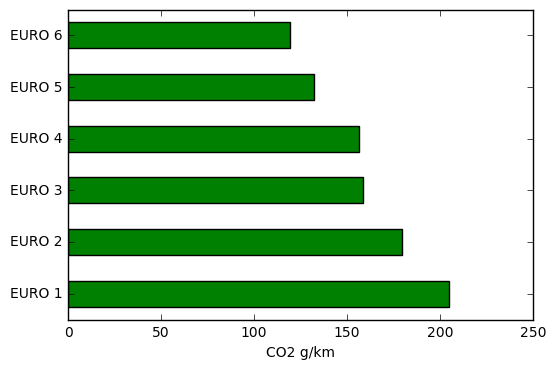

In [168]:
#po_euro = tabela.groupby('Okoljevarstvena oznaka')[['Leto izdelave', 'CO2', 'Poraba goriva']]
po_euro = round(tabela.groupby('Okoljevarstvena oznaka')['CO2'].mean(), 3)
evro = pd.DataFrame(po_euro)
EURO = evro.reset_index()[1:]

EURO.index = ["EURO " + str(i) for i in range(1,7)]
EUROco2 = EURO['CO2']
xy = EUROco2.plot(kind='barh', color='green')
xy.set_xlabel('CO2 g/km')


#moc.groupby('Registrsko obmocje')[['Moc', 'ccm']].mean()

In [186]:
#EURO['Poraba goriva'] = round(tabela.groupby('Okoljevarstvena oznaka')['Poraba goriva'].mean(), 3)
n = round(tabela.groupby('Okoljevarstvena oznaka')['Poraba goriva'].mean(), 3)
n = pd.DataFrame(n)
#n = n.reset_index()[1:]
n = n.reset_index()
n
#evro = evro.reset_index()
#evro['Poraba goriva'] = n['Poraba goriva']
#evro
a = pd.concat([evro, n], axis=2)
a
a = a[a.columns[2:]]
a
b = a['Okoljevarstvena oznaka', 'CO2', 'Poraba goriva']
b



KeyError: ('Okoljevarstvena oznaka', 'CO2', 'Poraba goriva')

In [156]:
moc_kraji = round(moc.groupby('Registrsko obmocje')[['Moc', 'Poraba goriva', 'Leto izdelave', 'Okoljevarstvena oznaka', 'ccm']].mean(), 3)
MOC = pd.DataFrame(moc_kraji).sort_values('Moc', ascending=False)


Dodajmo še stolpce z odstotkovnimi vrednostmi.

In [28]:
MOC['gorivo%'] = round((MOC['Poraba goriva'] - min(MOC['Poraba goriva'])) / (max(MOC['Poraba goriva']) - min(MOC['Poraba goriva'])), 3)
MOC['moc%'] = round((MOC['Moc'] - min(MOC['Moc'])) / (max(MOC['Moc']) - min(MOC['Moc'])), 3)
MOC['leto%'] = round((MOC['Leto izdelave'] - min(MOC['Leto izdelave'])) / (max(MOC['Leto izdelave']) - min(MOC['Leto izdelave'])), 3)
MOC['okolje%'] = round((MOC['Okoljevarstvena oznaka'] - min(MOC['Okoljevarstvena oznaka'])
                 ) / (max(MOC['Okoljevarstvena oznaka']) - min(MOC['Okoljevarstvena oznaka'])), 3)
MOC['ccm%'] = round((MOC['ccm'] - min(MOC['ccm'])) / (max(MOC['ccm']) - min(MOC['ccm'])), 3)

MOC.reset_index()

,Registrsko obmocje,Moc,Poraba goriva,Leto izdelave,Okoljevarstvena oznaka,ccm,gorivo%,moc%,leto%,okolje%,ccm%
0,KOPER,86.029,5.799,2009.077,4.340,1696.559,0.560,1.000,0.374,0.375,1.000
1,LJUBLJANA,85.888,5.757,2009.598,4.452,1675.946,0.393,0.981,0.737,0.721,0.831
2,POSTOJNA,83.766,5.847,2009.976,4.542,1621.582,0.750,0.691,1.000,1.000,0.384
3,SLOVENJ GRADEC,83.466,5.889,2009.308,4.385,1659.261,0.917,0.650,0.535,0.514,0.694
4,NOVA GORICA,82.423,5.910,2008.539,4.219,1657.053,1.000,0.507,0.000,0.000,0.676
5,KRANJ,82.194,5.855,2009.208,4.360,1636.617,0.782,0.476,0.466,0.437,0.508
6,CELJE,82.190,5.767,2009.082,4.338,1648.889,0.433,0.476,0.378,0.368,0.608
7,MARIBOR,81.725,5.813,2009.280,4.370,1625.649,0.615,0.412,0.516,0.467,0.418
8,KRSKO,81.568,5.771,2008.720,4.267,1664.412,0.448,0.391,0.126,0.149,0.736
9,NOVO MESTO,80.050,5.658,2009.069,4.323,1620.720,0.000,0.183,0.369,0.322,0.377


Raziščimo povezavo med porabo goriva in močjo avtomobilov.

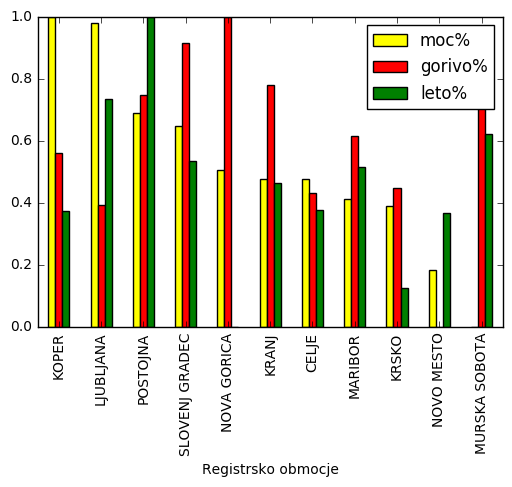

In [29]:
MOC[['moc%', 'gorivo%', 'leto%']].plot(kind='bar', color=('yellow', 'red', 'green'))

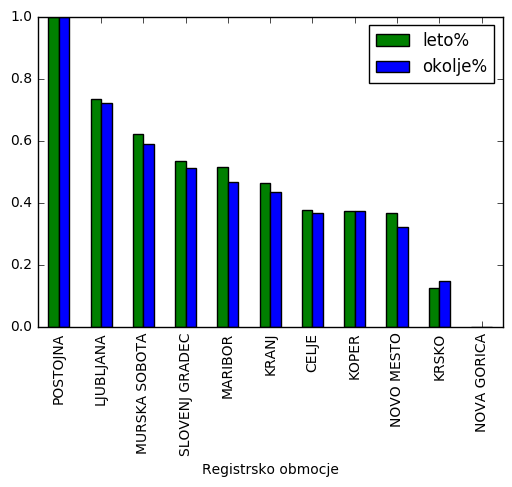

In [39]:
MOC[['leto%', 'okolje%']].sort_values('leto%', ascending=False).plot(kind='bar', color=('green', 'blue'))

Tam, kjer so avtomobili v povprečju novejši, imajo tudi višjo okoljevarstveno oznako, kar je seveda pričakovano.

In [31]:
co2 = tabela[['Registrsko obmocje', 'CO2']]

In [32]:
co2_kraji = co2.groupby('Registrsko obmocje')['CO2'].mean()
co2_po_krajih = pd.DataFrame(co2_kraji).sort_values('CO2')
CO2 = co2_po_krajih
#CO2

In [33]:
leto = tabela[['Registrsko obmocje', 'Leto izdelave']]

In [34]:
leto_kraji = leto.groupby('Registrsko obmocje')['Leto izdelave'].mean()
leto_po_krajih = pd.DataFrame(leto_kraji).sort_values('Leto izdelave')
LETO = leto_po_krajih
#LETO

In [35]:
euro = tabela[['Registrsko obmocje', 'Okoljevarstvena oznaka']]

In [36]:
euro_kraji = euro.groupby('Registrsko obmocje')['Okoljevarstvena oznaka'].mean()
euro_kraji
euro_po_krajih = pd.DataFrame(euro_kraji).sort_values('Okoljevarstvena oznaka')
EURO = euro_po_krajih
#EURO

In [37]:
#HURA, leto izdelave se ujema z okoljevarstveno oznako!!

Primerjajmo še, kako so parametri odvisni od znamke vozila.